In [1]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.5 MB/s eta 0:00:00


In [2]:
# Importing the yfinance package
import yfinance as yf
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np
import pmdarima as pm
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Get today's date
today = date.today()

start_date = '2016-01-01'
end_date = today

In [4]:
# Set the ticker
ticker = 'GOOGL'

In [5]:
# Get the data
data = yf.download(ticker, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [6]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,38.110001,38.110001,37.376999,37.972000,37.972000,67382000
2016-01-05,38.205002,38.459999,37.782501,38.076500,38.076500,45216000
2016-01-06,37.518501,38.286499,37.400002,37.966499,37.966499,48206000
2016-01-07,37.324501,37.765499,36.764000,37.049999,37.049999,63132000
2016-01-08,37.389999,37.506001,36.445999,36.545502,36.545502,47506000
...,...,...,...,...,...,...
2024-04-17,155.619995,157.080002,154.580002,155.470001,155.470001,21763100
2024-04-18,155.339996,156.940002,154.619995,156.009995,156.009995,19883000
2024-04-19,156.199997,156.360001,152.300003,154.089996,154.089996,32239100


In [7]:
data.reset_index(inplace=True)

In [8]:
data.sample()

,Date,Open,High,Low,Close,Adj Close,Volume
206,2016-10-26,41.355999,41.385502,40.817501,41.105,41.105,35898000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2090 non-null   datetime64[ns]
 1   Open       2090 non-null   float64       
 2   High       2090 non-null   float64       
 3   Low        2090 non-null   float64       
 4   Close      2090 non-null   float64       
 5   Adj Close  2090 non-null   float64       
 6   Volume     2090 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 114.4 KB


In [10]:
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2090,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2.090000e+03
mean,2020-02-26 06:23:46.220095488,81.481741,82.359280,80.642330,81.525123,81.525123,3.491942e+07
min,2016-01-04 00:00:00,34.124500,34.166500,33.632999,34.056999,34.056999,9.312000e+06
25%,2018-01-30 06:00:00,52.461876,52.944750,51.717001,52.394001,52.394001,2.489968e+07
50%,2020-02-27 12:00:00,67.465500,68.126251,66.930000,67.437748,67.437748,3.072000e+07
75%,2022-03-23 18:00:00,114.869623,116.303627,113.489252,114.547003,114.547003,3.970700e+07
max,2024-04-23 00:00:00,158.860001,160.220001,157.139999,159.410004,159.410004,1.407980e+08
std,NaN,36.104014,36.530526,35.709110,36.125344,36.125344,1.614753e+07


#Candlestick chart

In [11]:
#Candlestick chart:- A type of price chart used in technical analysis that displays the low, high and closing prices of a security for a specific period.
figure=go.Figure(data=[go.Candlestick(x=data["Date"],open=data["Open"],high=data["High"],low=data["Low"],close=data["Close"])])
figure.update_layout(title="Google Stock Price Analysis",xaxis_rangeslider_visible=False)
figure.show()

#Closing prices of our whole data in bar plot form

In [12]:
figure = px.bar(data, x = "Date", y= "Close", color_discrete_sequence=["#2c3e50"])
figure.show()

In [13]:
#we can observe that the closing prices were highest on April 11, 2024 and the lowest was observd on March 23, 2020.

In [14]:
#Here we add a rangeslider through which we can visualize the data of a particular period of choice.
figure = px.line(data, x='Date', y='Close', title='Stock Market Analysis with Rangeslider')
figure.update_xaxes(rangeslider_visible=True)
figure.show()

In [15]:
# The data can be visualized with help of a time period selectors, which help us to get the data of various timeperiods like 1 month, 6 months, 12 months.
figure = px.line(data, x='Date', y='Close',
                 title='Stock Market Analysis with Time Period Selectors')

figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

In [16]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,38.110001,38.110001,37.376999,37.972000,37.972000,67382000
1,2016-01-05,38.205002,38.459999,37.782501,38.076500,38.076500,45216000
2,2016-01-06,37.518501,38.286499,37.400002,37.966499,37.966499,48206000
3,2016-01-07,37.324501,37.765499,36.764000,37.049999,37.049999,63132000
4,2016-01-08,37.389999,37.506001,36.445999,36.545502,36.545502,47506000
...,...,...,...,...,...,...,...
2085,2024-04-17,155.619995,157.080002,154.580002,155.470001,155.470001,21763100
2086,2024-04-18,155.339996,156.940002,154.619995,156.009995,156.009995,19883000
2087,2024-04-19,156.199997,156.360001,152.300003,154.089996,154.089996,32239100
2088,2024-04-22,154.309998,157.639999,154.059998,156.279999,156.279999,26446200


In [17]:
# train / test split
train = data.query('Date <  "2022-01-01"')
test = data.query('Date >= "2022-01-01"')

In [18]:
train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,38.110001,38.110001,37.376999,37.972000,37.972000,67382000
1,2016-01-05,38.205002,38.459999,37.782501,38.076500,38.076500,45216000
2,2016-01-06,37.518501,38.286499,37.400002,37.966499,37.966499,48206000
3,2016-01-07,37.324501,37.765499,36.764000,37.049999,37.049999,63132000
4,2016-01-08,37.389999,37.506001,36.445999,36.545502,36.545502,47506000
...,...,...,...,...,...,...,...
1506,2021-12-27,147.255997,148.343994,147.169495,147.906494,147.906494,15976000
1507,2021-12-28,148.235992,148.298996,146.054504,146.686996,146.686996,18200000
1508,2021-12-29,146.644501,147.417007,145.647507,146.654999,146.654999,17788000
1509,2021-12-30,146.694000,147.300003,145.994507,146.200500,146.200500,15688000


In [19]:
test

,Date,Open,High,Low,Close,Adj Close,Volume
1511,2022-01-03,145.054993,145.850998,143.712997,144.991501,144.991501,28646000
1512,2022-01-04,145.395996,146.485001,143.716507,144.399506,144.399506,28400000
1513,2022-01-05,144.419998,144.499496,137.688004,137.774994,137.774994,54618000
1514,2022-01-06,136.998505,139.940002,136.558502,137.747498,137.747498,37348000
1515,2022-01-07,138.145493,138.448502,135.766495,137.016998,137.016998,29760000
...,...,...,...,...,...,...,...
2085,2024-04-17,155.619995,157.080002,154.580002,155.470001,155.470001,21763100
2086,2024-04-18,155.339996,156.940002,154.619995,156.009995,156.009995,19883000
2087,2024-04-19,156.199997,156.360001,152.300003,154.089996,154.089996,32239100
2088,2024-04-22,154.309998,157.639999,154.059998,156.279999,156.279999,26446200


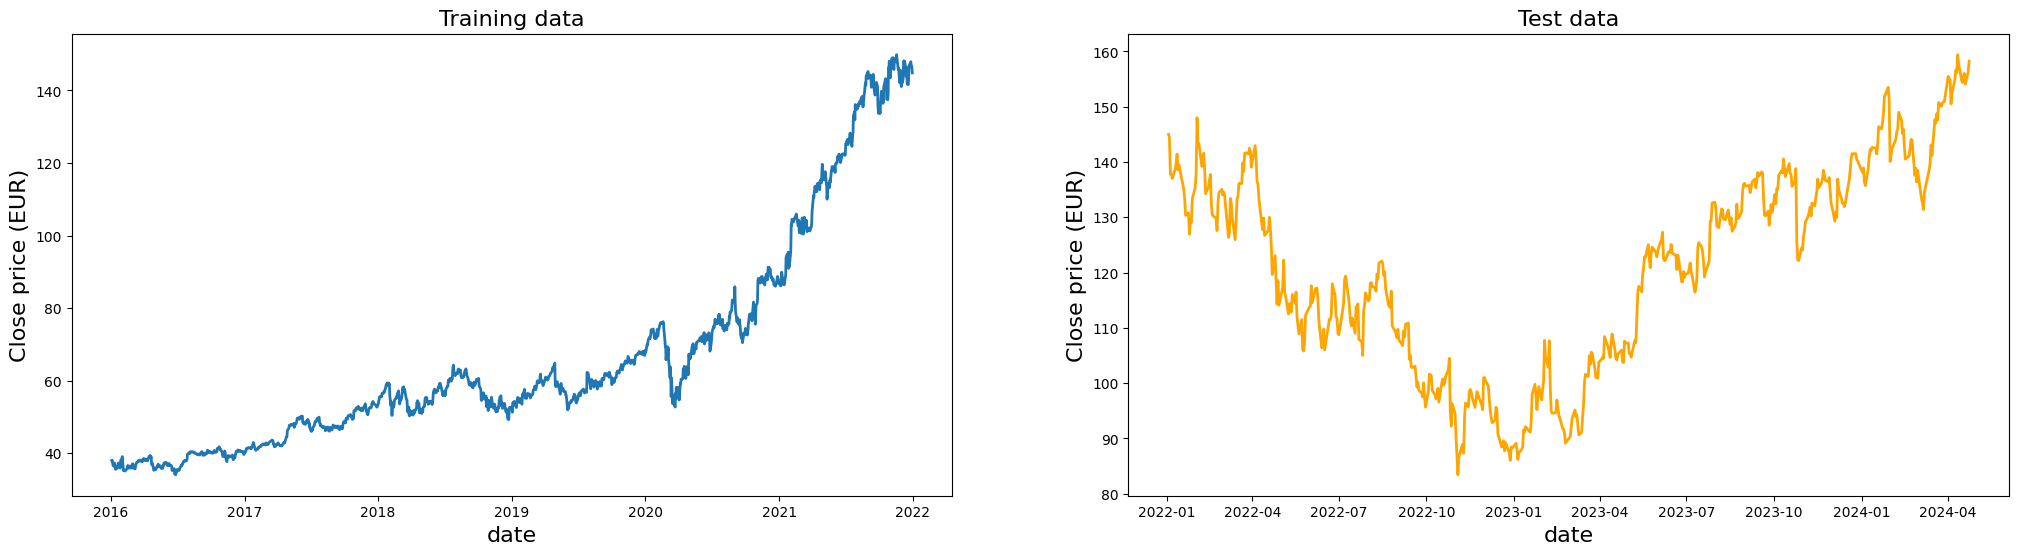

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 6))
ax1.plot(train.Date, train['Close'], lw=2)
ax1.set_xlabel("date", fontsize=16)
ax1.set_ylabel("Close price (EUR)", fontsize=16)
ax1.set_title("Training data", fontsize=16)
ax2.plot(test.Date, test['Close'], c='orange', lw=2)
ax2.set_xlabel("date", fontsize=16)
ax2.set_ylabel("Close price (EUR)", fontsize=16)
ax2.set_title("Test data", fontsize=16);

#Check for stationarity of time series

**ACF plot and PACF plot**

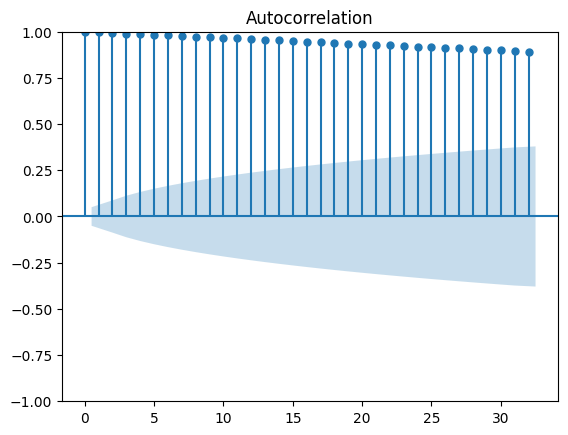

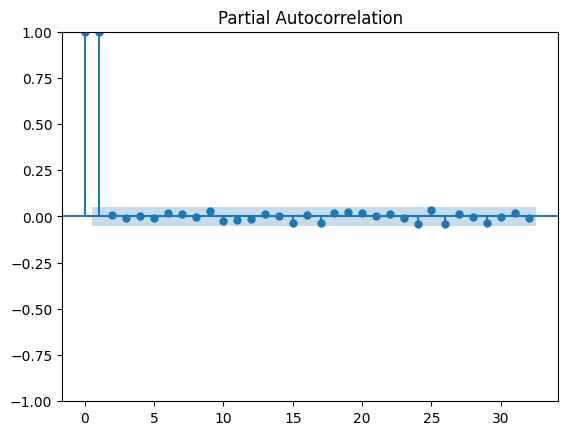

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(train['Close'])

pacf_original = plot_pacf(train['Close'])

**Augmented Dickey Fuller test**

In [22]:
from statsmodels.tsa.stattools import adfuller

#Test for stationarity
def test_stationarity(timeseries):
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
      output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(train['Close'])

Results of dickey fuller test
Test Statistics                   1.562423
p-value                           0.997740
No. of lags used                 19.000000
Number of observations used    1491.000000
critical value (1%)              -3.434743
critical value (5%)              -2.863480
critical value (10%)             -2.567803
dtype: float64


**ADF test**

In [23]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(train['Close'])
print(f'p-value: {adf_test[1]}')

p-value: 0.997740345914316


#Transform to stationary: differencing

<Axes: >

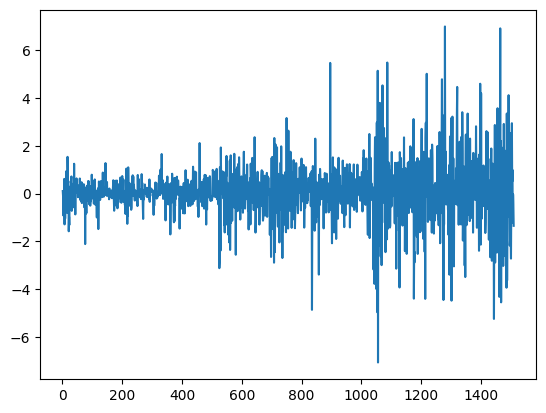

In [24]:
# Assuming train is your NumPy array
train_series = pd.Series(train['Close'])
# If the p-value is greater than 0.05, apply differencing to make the data stationary

df_train_diff = train_series.diff().dropna()
df_train_diff.plot()

In [25]:
df_train_diff

1       0.104500
2      -0.110001
3      -0.916500
4      -0.504498
5       0.107998
          ...   
1506    0.989990
1507   -1.219498
1508   -0.031998
1509   -0.454498
1510   -1.348495
Name: Close, Length: 1510, dtype: float64

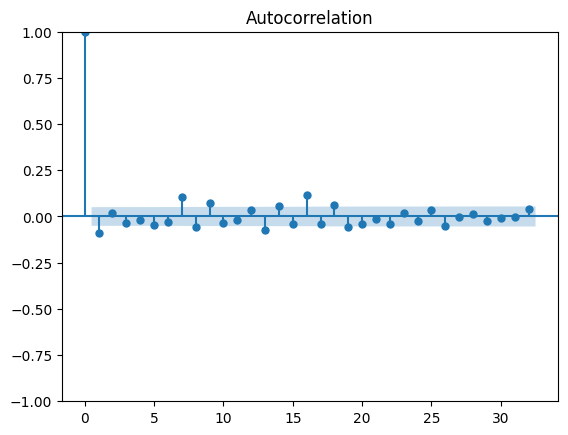

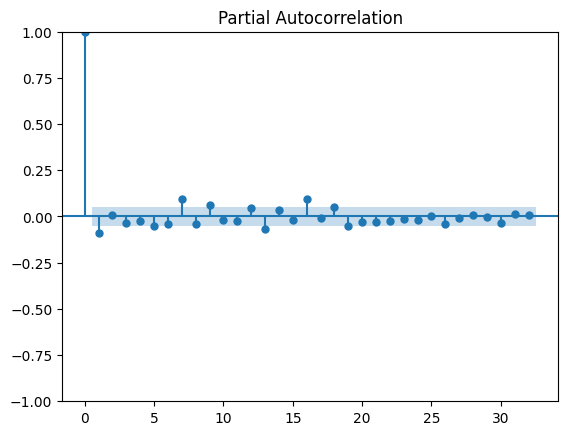

In [26]:
acf_diff = plot_acf(df_train_diff)

pacf_diff = plot_pacf(df_train_diff)

In [27]:
adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 2.640766038693338e-13


In [28]:
train=df_train_diff

In [29]:
train

1       0.104500
2      -0.110001
3      -0.916500
4      -0.504498
5       0.107998
          ...   
1506    0.989990
1507   -1.219498
1508   -0.031998
1509   -0.454498
1510   -1.348495
Name: Close, Length: 1510, dtype: float64

In [30]:
test=test['Close']
test

1511    144.991501
1512    144.399506
1513    137.774994
1514    137.747498
1515    137.016998
           ...    
2085    155.470001
2086    156.009995
2087    154.089996
2088    156.279999
2089    158.259995
Name: Close, Length: 579, dtype: float64

In [31]:
import itertools
import warnings
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Suppress ARIMA convergence warnings
warnings.filterwarnings("ignore")

# Function to evaluate ARIMA model
def evaluate_arima_model(train, arima_order):
    p, d, q = arima_order
    # Fit ARIMA model
    model = ARIMA(train, order=(p,d,q))
    model_fit = model.fit()
    # Calculate AIC and BIC
    aic = model_fit.aic
    bic = model_fit.bic
    return aic, bic

# Function to grid search ARIMA parameters
def grid_search_arima(train, p_values, d_values, q_values):
    best_aic, best_bic, best_cfg = float("inf"), float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    aic, bic = evaluate_arima_model(train, order)
                    if aic < best_aic:
                        best_aic, best_bic, best_cfg = aic, bic, order
                    print('ARIMA%s AIC=%.2f BIC=%.2f' % (order, aic, bic))
                except:
                    continue
    print('Best ARIMA%s AIC=%.2f BIC=%.2f' % (best_cfg, best_aic, best_bic))
    return best_cfg

# Define range of p, d, q values
p_values = range(0, 5)
d_values = range(0, 1)
q_values = range(0, 5)

# Grid search ARIMA parameters
best_cfg = grid_search_arima(train, p_values, d_values, q_values)

# Print the best combination of p, d, and q values
print("Best combination of p, d, q:", best_cfg)

# Fit final ARIMA model with best parameters
model = ARIMA(train, order=best_cfg)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Calculate RMSE
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print('Test RMSE: %.3f' % rmse)


ARIMA(0, 0, 0) AIC=4745.04 BIC=4755.68
ARIMA(0, 0, 1) AIC=4734.71 BIC=4750.67
ARIMA(0, 0, 2) AIC=4736.55 BIC=4757.83
ARIMA(0, 0, 3) AIC=4735.92 BIC=4762.52
ARIMA(0, 0, 4) AIC=4737.12 BIC=4769.04
ARIMA(1, 0, 0) AIC=4734.47 BIC=4750.43
ARIMA(1, 0, 1) AIC=4736.16 BIC=4757.44
ARIMA(1, 0, 2) AIC=4737.38 BIC=4763.98
ARIMA(1, 0, 3) AIC=4736.12 BIC=4768.03
ARIMA(1, 0, 4) AIC=4738.69 BIC=4775.93
ARIMA(2, 0, 0) AIC=4736.36 BIC=4757.64
ARIMA(2, 0, 1) AIC=4737.99 BIC=4764.58
ARIMA(2, 0, 2) AIC=4737.28 BIC=4769.20
ARIMA(2, 0, 3) AIC=4729.27 BIC=4766.51
ARIMA(2, 0, 4) AIC=4739.39 BIC=4781.95
ARIMA(3, 0, 0) AIC=4736.46 BIC=4763.06
ARIMA(3, 0, 1) AIC=4735.92 BIC=4767.84
ARIMA(3, 0, 2) AIC=4729.22 BIC=4766.46
ARIMA(3, 0, 3) AIC=4729.31 BIC=4771.87
ARIMA(3, 0, 4) AIC=4718.97 BIC=4766.85
ARIMA(4, 0, 0) AIC=4737.41 BIC=4769.33
ARIMA(4, 0, 1) AIC=4737.40 BIC=4774.64
ARIMA(4, 0, 2) AIC=4738.38 BIC=4780.93
ARIMA(4, 0, 3) AIC=4729.20 BIC=4777.08
ARIMA(4, 0, 4) AIC=4709.10 BIC=4762.30
Best ARIMA(4, 0, 4) AIC=4

In [32]:
p=4
d=0
q=4

In [33]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(p,d,q))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1510
Model:                 ARIMA(4, 0, 4)   Log Likelihood               -2344.549
Date:                Wed, 24 Apr 2024   AIC                           4709.098
Time:                        19:34:46   BIC                           4762.296
Sample:                             0   HQIC                          4728.910
                               - 1510                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0701      0.028      2.528      0.011       0.016       0.125
ar.L1         -0.3291      0.040     -8.263      0.000      -0.407      -0.251
ar.L2          0.6705      0.047     14.307      0.0

In [34]:
"""import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from itertools import product

# Define a function to evaluate ARIMA model with given parameters
def evaluate_arima_model(data, order):
    # Split data into train and test sets
    #train_size = int(len(data) * 0.8)
    #train, test = data[:train_size], data[train_size:]
    data=data['Close']
    history = [x for x in train]
    # Make predictions
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # Calculate MSE
    mse = mean_squared_error(test, predictions)
    return mse

# Define range of p, d, q values
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
# Generate all possible combinations of p, d, q values
parameters = product(p_values, d_values, q_values)

# Load your data here (replace 'your_data.csv' with your actual data file)
# df = pd.read_csv('your_data.csv')

# Example: Generating sample data (replace this with loading your actual data)
np.random.seed(0)


# Convert data to stationary if needed
# For example, you can use differencing
# df_diff = df.diff().dropna()

# Define best MSE and corresponding parameters
best_mse = float('inf')
best_params = None

# Grid search for optimal parameters
for param in parameters:
    try:
        mse = evaluate_arima_model(data, param)
        print('ARIMA%s MSE=%.3f' % (param, mse))
        if mse < best_mse:
            best_mse = mse
            best_params = param
    except:
        continue

print('Best ARIMA%s MSE=%.3f' % (best_params, best_mse))
"""

"import pandas as pd\nimport numpy as np\nfrom statsmodels.tsa.arima.model import ARIMA\nfrom sklearn.metrics import mean_squared_error\nfrom itertools import product\n\n# Define a function to evaluate ARIMA model with given parameters\ndef evaluate_arima_model(data, order):\n    # Split data into train and test sets\n    #train_size = int(len(data) * 0.8)\n    #train, test = data[:train_size], data[train_size:]\n    data=data['Close']\n    history = [x for x in train]\n    # Make predictions\n    predictions = []\n    for t in range(len(test)):\n        model = ARIMA(history, order=order)\n        model_fit = model.fit(disp=0)\n        yhat = model_fit.forecast()[0]\n        predictions.append(yhat)\n        history.append(test[t])\n    # Calculate MSE\n    mse = mean_squared_error(test, predictions)\n    return mse\n\n# Define range of p, d, q values\np_values = range(0, 3)\nd_values = range(0, 3)\nq_values = range(0, 3)\n# Generate all possible combinations of p, d, q values\nparame

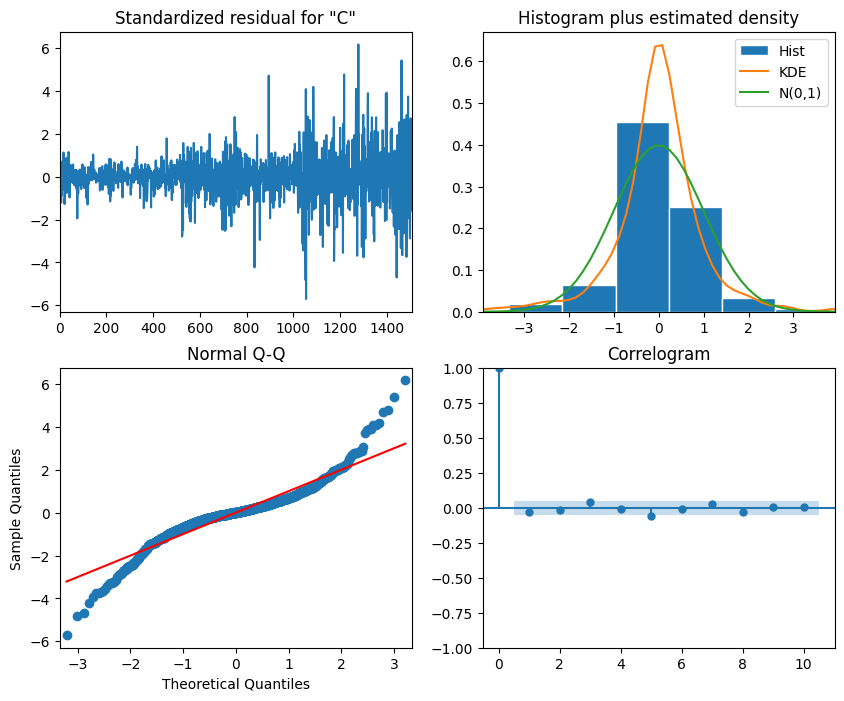

In [35]:
# Plot model diagnostics
model_fit.plot_diagnostics(figsize=(10, 8))
plt.show()

In [47]:
# Predict future values
forecast_steps = 3
forecast = model_fit.forecast(steps=forecast_steps)

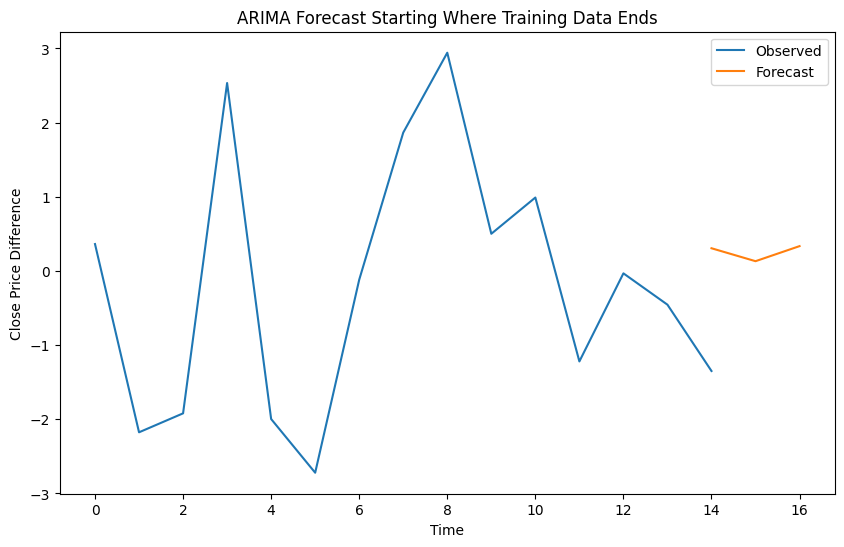

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming train is a numpy array or pandas Series
train_last_15 = train[-15:] if isinstance(train, np.ndarray) else train.iloc[-15:]

# Adjust the forecast indices to start where the training data ends
forecast_start_index = len(train_last_15)-1
forecast_end_index = forecast_start_index + len(forecast)

# Plot the forecast starting where the training data ends
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(train_last_15)), train_last_15, label='Observed')
plt.plot(np.arange(forecast_start_index, forecast_end_index), forecast, label='Forecast')
plt.xlabel('Time')
plt.ylabel('Close Price Difference')
plt.title('ARIMA Forecast Starting Where Training Data Ends')
plt.legend()
plt.show()


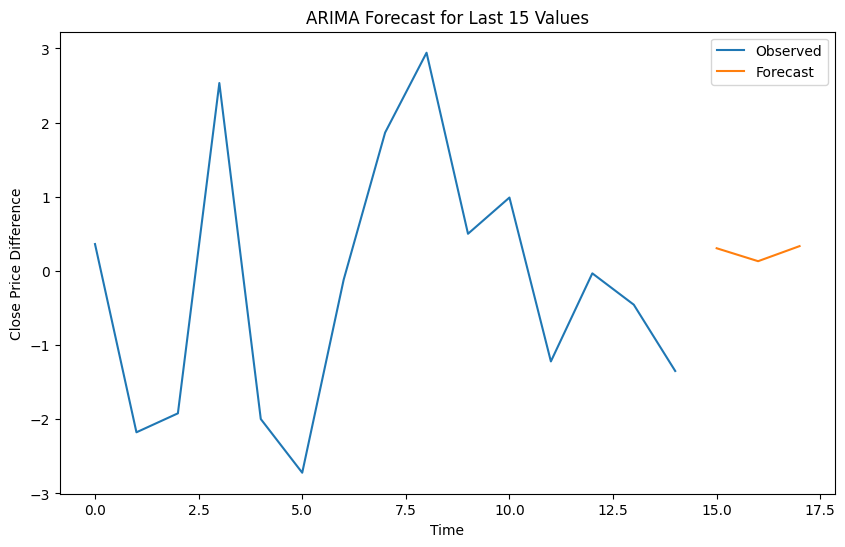

In [48]:
"""import numpy as np
import matplotlib.pyplot as plt

# Assuming train is a numpy array or pandas Series
train_last_15 = train[-15:] if isinstance(train, np.ndarray) else train.iloc[-15:]

# Plot the forecast for the last 15 values
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(train_last_15)), train_last_15, label='Observed')
plt.plot(np.arange(len(train_last_15), len(train_last_15) + len(forecast)), forecast, label='Forecast')
plt.xlabel('Time')
plt.ylabel('Close Price Difference')
plt.title('ARIMA Forecast for Last 15 Values')
plt.legend()
plt.show()
"""

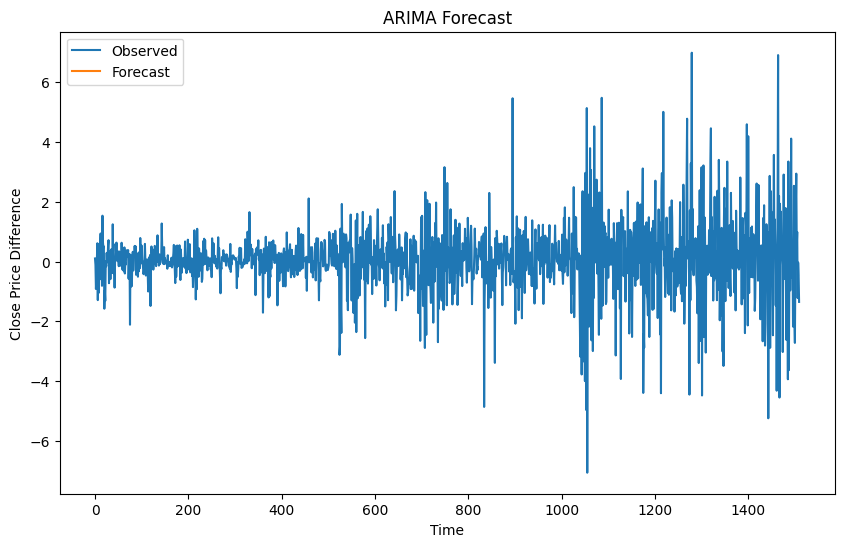

In [37]:
"""# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(train)), train, label='Observed')
plt.plot(np.arange(len(train), len(train) + forecast_steps), forecast, label='Forecast')
plt.xlabel('Time')
plt.ylabel('Close Price Difference')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()"""

#LSTM

In [52]:
df_close=data['Close']

In [53]:
df_close

0        37.972000
1        38.076500
2        37.966499
3        37.049999
4        36.545502
           ...    
2085    155.470001
2086    156.009995
2087    154.089996
2088    156.279999
2089    158.259995
Name: Close, Length: 2090, dtype: float64

In [54]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_close=scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [55]:
df_close

array([[0.03123181],
       [0.03206545],
       [0.03118793],
       ...,
       [0.95755979],
       [0.97503048],
       [0.99082583]])

In [56]:
##splitting dataset into train and test split
training_size=int(len(df_close)*0.65)
test_size=len(df_close)-training_size
train_data,test_data=df_close[0:training_size,:],df_close[training_size:len(df_close),:1]

In [57]:
training_size,test_size

(1358, 732)

In [59]:
train_data

array([[0.03123181],
       [0.03206545],
       [0.03118793],
       ...,
       [0.64337906],
       [0.67006773],
       [0.67079766]])

In [60]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [61]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [62]:
print(X_train.shape), print(y_train.shape)

(1257, 100)
(1257,)


(None, None)

In [63]:
print(X_test.shape), print(y_test.shape)

(631, 100)
(631,)


(None, None)

In [64]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [65]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [66]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])

In [67]:
# Fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
20/20 [==============================] - 18s 513ms/step - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 2/50
20/20 [==============================] - 4s 211ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 3/50
20/20 [==============================] - 6s 319ms/step - loss: 6.1419e-04 - mean_squared_error: 6.1419e-04 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 4/50
20/20 [==============================] - 7s 347ms/step - loss: 5.4357e-04 - mean_squared_error: 5.4357e-04 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 5/50
20/20 [==============================] - 5s 270ms/step - loss: 5.2977e-04 - mean_squared_error: 5.2977e-04 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 6/50
20/20 [==============================] - 4s 195ms/step - loss: 5.2854e-04 - mean_squared_error: 5.2854e-04 - val_loss: 0.0025 - val_mean_squared_error: 0.

In [68]:
import tensorflow as tf

In [69]:
tf.__version__

'2.15.0'

In [70]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

20/20 [==============================] - 1s 40ms/step


In [71]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [72]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

62.327390671503856

In [73]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

124.722437859033

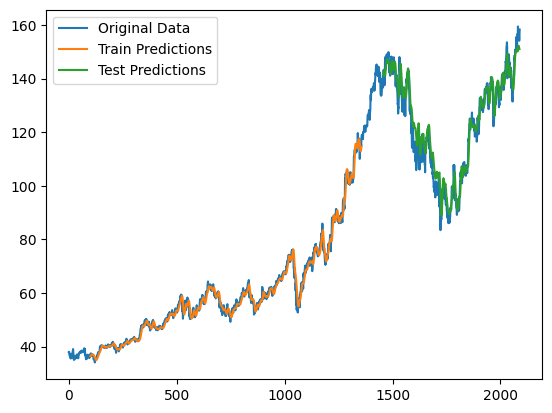

In [74]:
### Plotting
# shift train predictions for plotting
look_back=100

# Original Data
original_data = scaler.inverse_transform(df_close)

# Train Predictions
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# Test Predictions
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_close)-1, :] = test_predict

# Plot baseline and predictions
plt.plot(original_data, label='Original Data')
plt.plot(trainPredictPlot, label='Train Predictions')
plt.plot(testPredictPlot, label='Test Predictions')
plt.legend()
plt.show()
